# Prob #1 Theory

hw1_prob1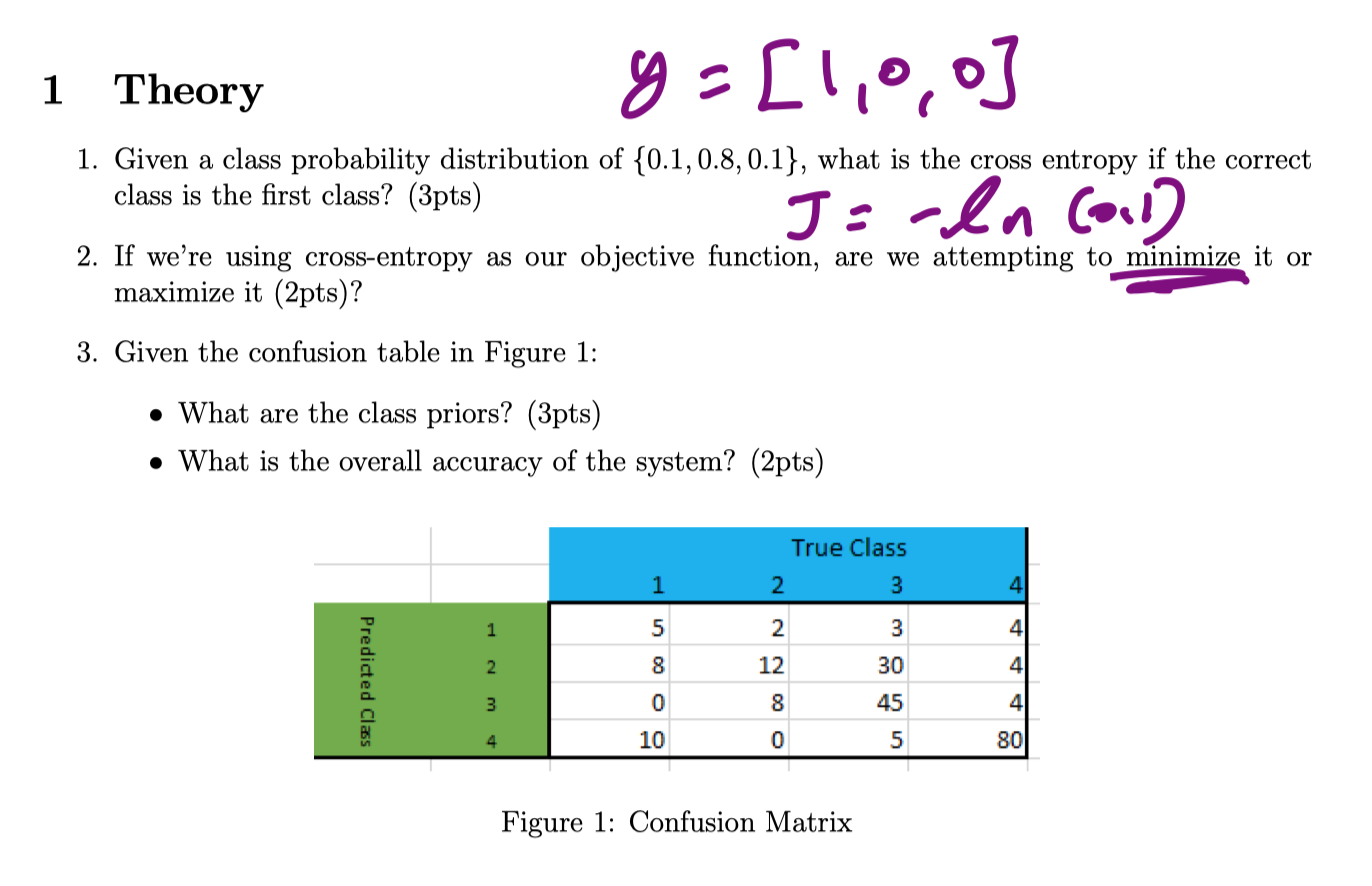

In [37]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Cost function and confusion matrix

### cross entropy =y*log(P) of softmax
Multi-class
Here target y=1 and P=0.1

Softmax:
- Softmax gives Prob of all classes
- Maximize the prob of be class k (y=1)  [1,0,0]
- Don't care about other class


Sigmoid:
- give p=1/(1+e-z)
- cost y*log(P)+(1-y)*log(1-P)
- for a single data
  - cost= -log(P),y=1
  - cost=-log(1-p),y=0
  
- maxmize Prob of the correct class
- when p<0.5, altough we call it y=0 class, in fact, the target is 1 (1-y)

In [2]:
cross_entropy=-math.log(0.1,2)

### We're minimizing cross entropy - KL distance.

### Class prior 

In [6]:
class1=5+8+10
class2=2+12+8
class3=3+30+45+5
class4=4+4+4+80
total=class1+class2+class3+class4

In [7]:
prob1=class1/total
prob2=class2/total
prob3=class3/total
prob4=class4/total
print(prob1,prob2,prob3,prob4)

0.10454545454545454 0.1 0.37727272727272726 0.41818181818181815


### Overall accuray of the system
- those correct prediction over total 

In [9]:
accu=(5+12+45+80)/total
print(accu)

0.6454545454545455


## Gradient descent 

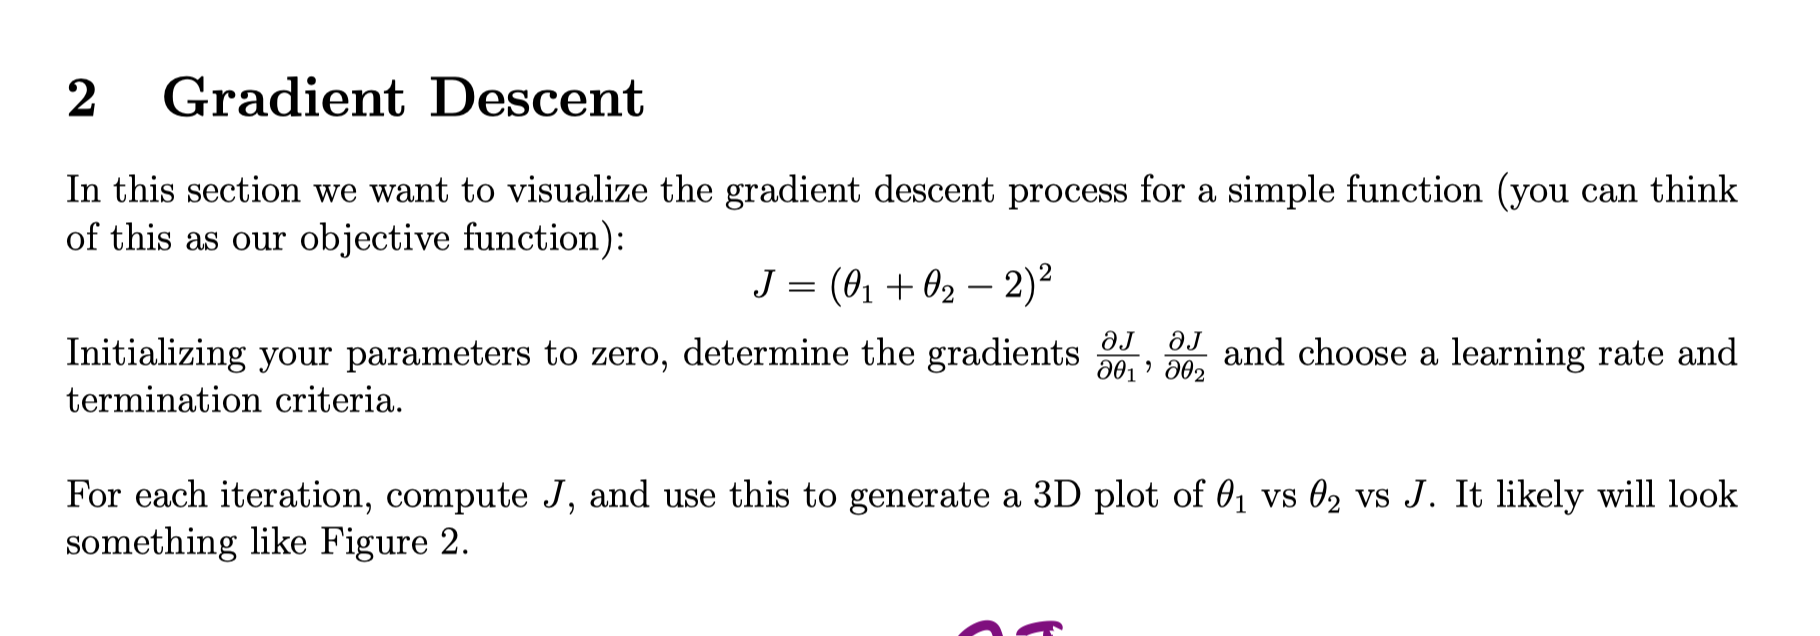

- One fixed data point (1,1)-- target 2
- no bias

In [102]:
X=np.array([[1,1]])
w=np.random.uniform((-1,1),2)
J=X@w-2
gradient=2*X.T@(X@w-2)


In [99]:
error_his=[]
w_his=[]
J_his.append(J)
it=0
error=1
while error>2e-24 or it<1000:
    lr=0.001
    gradient=2*X.T@(X@w-2)
    w=w-lr*gradient
    J=(X@w-2)**2
    J_his.append(J)
    error=J_his[-1]-J_his[-2]
    error_his.append(error)
    it+=1


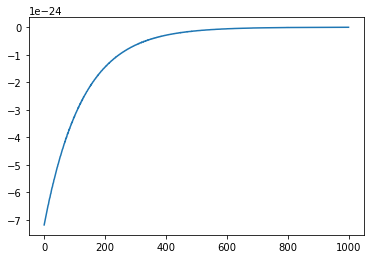

In [100]:
plt.plot(error_his)

# Prob #2 Gradient descent of Logistic regression 

Cost function:
- Sigmoid (MLE)
- Softmax (Cross entropy)

**The gradient is the same**:

- maxmize similarity between weights and the training data
- minimize y-ypred

## MLE

- Target should be a vector with 1 and 0s
-  What's passed to MLE is scalar..since you're give a predict y..

In [ ]:
targe=[1,0,1,1]

In [ ]:
def MLE(X,y,ethta):
    line=np.dot(X,ethta)
    p=(1/(1+np.exp(-line)))+1e-15   ## to avoid 0log(0)
    f=-(y*np.log(abs(p))+(1-y)*np.log(abs(1-p))) ## y is the real occurrence of the event determinded by dataset
    return f.mean()

- Sigmoid knows the correct class should have P>0.5.
 
- That's why learn the separation line that way

## Forward proga

### One-hot target vector

- Target should be one-hot vector
- what's passed to cross entropy is a vector since you're giving a vector of probability [Prob1,prob2,prob3]

In [325]:
target=np.array([[1,0,0],
                [0,1,0],
                [1,0,0],
                [1,0,0],
                [0,0,1]])


### Softmax-  Make decision by comparing all classes 
- softmax=f(Z1,Z2,Z3)

Z is similarity score or raw output layer 

In [326]:
def softmax(score):
    prb_exp=np.exp(score)
    sum_prb=prb_exp.sum(axis=1)
    return prb_exp/sum_prb[:,np.newaxis]

### Cross_entropy

The cross_entropy only left with -ln(y)

- how close the weights learn the training correctly (**compare p to 1 anyway**, 1 beacause of one-hot)

- **(sum(-ln(y)) for batch GD)**

In [327]:
def cross_entropy(prob,target):
    return np.diag(-np.log(prob@target))

### Logit regression and softmax cost function
<font color='red'>Output layer has two nodes (prob1 and prob0)</font>
- when class=1,one-hot vector[1,0],y=1(column 1), p-->1
- when class=0,one-hot vector[0,1],y=1(column 2), p-->1
    
because the y=1 under that class in one-hot vector  
 
----
Cost function is exactly the same in **logit regression:**

**Difference is prob is always calculated using class 1 that is p class 0=1-y**

- __individual case:__

    cost=-log(y),y=1  
    cost=-log(1-y),y=0 
  
- **sum:**

    cost=ylog(y)+(1-y)*log(1-y)
    
    
---
- <font color='red'>The class which node predicts correspondes to target one-hot **which one is one and it's corresponding class**</font>
- In two class classifier that uses **sigmoid**, it works the same way actually 
 - Since when y=0, cost=(1-y)log(1-p1), which is 1*log(p0)
 
__More on this see notebooks..__

---

Compared with DT, the neural net work **grouping the branches** corresponding to the same label together..
- Relu combination of piese-wise line


### Activation or softmax?

The X@W is: (X could be input vector or hidden layer nodes)
- similarity score(pass to softmax)
- features(pass to Relu)

----
<font color='red'>Single sample/test data:</font>  

- beta: input to node coeffcients
- theta: nodes to Z 

**Forward proga:**

- **Nodes:**
  - Results at nodes are a **<font color='green'>single scalar** </font>
    - similarity score to weights (training data 的print)
    - value of piecewise function beta(learned from training data by Relu Z)

  - in next layer, some nodes are irrelavant features ethat=0 (feature more relavant to other class)
  
- **Output layer:**
- Z score:similarity score to all classes
- Softmax: Decision is made by comparing relative magnitute of **three scores**


--- 
<font color='red'>Training dataset: </font>
- at the nodes,multiple points allow to learn continous **<font color='green'>piecewise line**</font>
- Node=feature=a piece of functions (分段Z=W@X)
- Output: cross entropy to be minimize...which is a function of all class Z scores thus all nodes/weights
  -  take is as the need to find find coefficients of revelant features too..
- what you're doing a linear classifier is dones for all piece-wise lines
  - **one node is a line**- think nodes as w@X and you're find X
  
**Backward proga:**
- nodes are relavant **piecewise line** presented to the datapoint (value region (peice) within which the poin is in )
- minmize residual by **projecting error to h=beta@X (nodes) or X (input)**
  - which is Gradient： error 随 weights 的最快变化rate
 

In [328]:
inp=np.array([[1,1,0,0],
            [0,0,1,0],
            [1,0,1,0],
            [0,1,1,0],
             [1,0,0,1]])

In [329]:
weights=np.random.uniform(-1,1,(inp.shape[1],target.shape[1])) ## learn the two classes separately
score=inp@weights ## similarity score(pass to softmax)/features(pass to Relu)
prob=softmax(score)
print("Softmax prob:",prob)

Softmax prob: [[0.22664139 0.23815892 0.53519969]
 [0.16605729 0.18188594 0.65205677]
 [0.05481492 0.11970419 0.82548089]
 [0.25030577 0.14450082 0.60519341]
 [0.13417901 0.45705118 0.40876981]]


In [330]:
print("Cross_entropy:",cross_entropy(prob,target.T))

Cross_entropy: [1.48438627 1.70437547 2.90379286 1.38507202 0.8946031 ]


## Multi_layer NN from scratch

### Sturecture of NN
Using sigmoid function
  

In [331]:
layer_n=[3,2]
output_n=target.shape[1]
inp_ly=inp.shape[1]

In [332]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [333]:
def drsigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [334]:
#https://www.kaggle.com/embed/niyipop/2-layer-neural-network-from-scratch-using-numpy
# https://www.kdnuggets.com/2019/11/build-artificial-neural-network-scratch-part-1.html
#https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/
def batch_GD(X,target,layer_n,lr=0.01):
    ly1=np.random.uniform(-1,1,(inp_ly,layer_n[0]))
    ly2=np.random.uniform(-1,1,(layer_n[0],output_n))
    ly1_node=sigmoid(X@ly1)
    ly2_node=sigmoid(ly1_node@ly2)
    
    error=1
    itr=1
    error_ls=list()
    error_ls.append(error)
    while itr<1000 or error_perc>1e-24:
        
        ly1_node=sigmoid(X@ly1)
        ly2_node=softmax(ly1_node@ly2)

        ly2_error=(target-ly2_node)
        ly2=ly2-lr*ly1_node.T@ly2_error/len(X)
        
        ly1_error=ly2_error@ly2_node.T@drsigmoid(ly1_node)
        ly1_delta=X.T@ly1_error
        ly1=ly1-lr*ly1_delta/len(X)
        
        error=np.mean(np.abs(ly2_error))
        
        error_ls.append(error)
        error_perc=(error_ls[-1]-error_ls[-2])/error_ls[-2]
        
        itr+=1
        
        return ly1,ly2
    

In [335]:
def predict(X,ly1,ly2):
    ly2_node=sigmoid(X@ly1)
    output_node=softmax(ly2_node@ly2)
    return output_node

In [336]:
ly1,ly2=batch_GD(inp,target,layer_n)

In [337]:
output=predict(inp,ly1,ly2)

In [338]:
output

array([[0.29372933, 0.44373456, 0.26253611],
       [0.20081002, 0.46194612, 0.33724385],
       [0.24577322, 0.43625329, 0.31797349],
       [0.24212684, 0.44919333, 0.30867983],
       [0.23888703, 0.4722964 , 0.28881657]])

In [ ]:
target=np.array([[1,0,0],
                [0,1,0],
                [1,0,0],
                [1,0,0]])


In [343]:
u=np.array([[3,-5,4]])
v=np.array([[1,2,5]]).T

In [344]:
u@v

array([[13]])